# Cognitive Performance Prediction: Linear Regression Model

<br>

## 1. Introduction

The purpose of this model is to predict users' cognitive performance based on several factors, including hours of sleep, stress levels, diet, exercise, reaction time, and memory test scores. Cognitive performance refers to the efficiency and effectiveness of mental processes such as thinking, learning, memory, problem-solving, and attention. It encompasses the functions that enable individuals to process information and perform tasks.

The model employs Linear Regression to make these predictions. Linear regression estimates the relationship between a dependent variable (cognitive performance) and one or more explanatory variables (such as sleep, exercise, diet, etc.).

To test the final model, execute `streamlit run app.py`. You can also run it via the deployed model [here](https://cognitiveperformancemodel-dlfhuqwmhsjjna6vvzaq2w.streamlit.app).

<br>

## 2. Data Overview

### Data Acquisition

The original data aqcuired from Kaggle can be accessed through the link provided below:
- [Download Data](https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis)

### Key Features of the Dataset

- **Age:** Age of the user

- **Gender:** Male/Female/Other

- **Sleep_Duration:** Sleep hours per night

- **Stress_Level:** Scale from 1 to 10

- **Diet_Type:** Vegetarian, Non-Vegetarian, Vegan

- **Daily_Screen_Time:** Hours spent on screens daily

- **Exercise_Frequency:** Low, Medium, High

- **Caffeine_Intake:** mg per day

- **Reaction_Time:** Time in milliseconds (ms)

- **Memory_Test_Score:** Score out of 100

- **Cognitive_Score:** ML model’s prediction of cognitive performance

<br>

## 3. Initial Data Exploration

In this section, the necessary libraries and datasets needed for analysis will be imported and initialized.

The following libraries are used:

- Library `pandas` will be required to work with data in tabular representation.

- Library `numpy` will be required to round the numerical data.

- Library `matplotlib`, `seaborn` will be required for data visualization.

- Library `sklearn` will be used to train the model.

- Library `joblit` will be used to export the model for deployment.

In [1]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import joblib
from scipy import stats
import numpy as np
%matplotlib inline

In [2]:
# Import data and save it as DataFrame
data_df = pd.read_csv('../data/human_cognitive_performance.csv')

# Dimensions of the data
print(f'The data contains {data_df.shape[0]} records and {data_df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{data_df.dtypes.value_counts()}')

# Display driver data
data_df.head()

The data contains 80000 records and 13 columns.

The data contains the following data types: 
float64    5
object     4
int64      4
Name: count, dtype: int64


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


Unnecessary values for model predictions, such as `User_ID` and `AI_Predicted_Score`, can be removed.

In [3]:
# Drop data
data_copy = data_df.copy()
data_copy.drop(['User_ID', 'AI_Predicted_Score'], axis=1, inplace=True)

# Display driver data
data_copy.head()

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71
1,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35
2,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57
3,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15
4,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54


<br>

## 4. Data Cleaning and Preprocessing

In this section, data pre-processing will be conducted by examining data types, addressing missing values, removing duplicates, analyzing measures of central tendency, and extracting features.

### 4.1 Missing Data

In [4]:
# Missing data
data_copy.isnull().sum()

Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
dtype: int64

**CONCLUSION:**

The dataset contains no missing values, so no additional modifications are needed.

### 4.2 Duplicate Data

In [5]:
# Duplicate data
data_copy.duplicated().any().sum()

0

In [6]:
# Frequency analysis
for col in data_copy:
    print(f'Column: {col}')
    print(data_copy[col].value_counts(), "\n")

Column: Age
Age
40    1979
50    1972
32    1963
29    1961
49    1959
44    1956
37    1955
43    1944
18    1941
33    1938
28    1928
19    1925
54    1924
58    1921
34    1921
55    1920
47    1920
48    1918
35    1915
56    1915
27    1914
22    1909
39    1909
51    1902
25    1901
30    1893
46    1888
53    1887
57    1887
31    1878
38    1877
24    1875
42    1872
59    1868
41    1859
21    1858
36    1853
20    1848
52    1848
26    1847
23    1829
45    1823
Name: count, dtype: int64 

Column: Gender
Gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64 

Column: Sleep_Duration
Sleep_Duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: count, Length: 61, dtype: int64 

Column: Stress_Level
Stress_Level
3     8103
8     8092
5     8070
7     8027
6     8020
4     8019
10    7969
1     7969
2     7931
9     7800
Name: count, dtype: int64 

Col

**CONCLUSION:** 

The data was processed to the point where only valid duplicates exist. Therefore, no further data transformation is necessary.

### 4.3 Transformation

In [7]:
# Check data 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


Values of type `object` cannot be processed by the machine learning model and should therefore be encoded into a readable boolean format through one-hot encoding. 

In [8]:
# One-hot encode
data_copy = pd.get_dummies(data_copy, columns=['Gender', 'Diet_Type', 'Exercise_Frequency'], drop_first=False)
data_copy.head()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian,Exercise_Frequency_High,Exercise_Frequency_Low,Exercise_Frequency_Medium
0,57,6.5,3,6.5,41,583.33,65,36.71,True,False,False,True,False,False,False,False,True
1,39,7.6,9,10.8,214,368.24,58,54.35,True,False,False,True,False,False,True,False,False
2,26,8.2,6,5.7,429,445.21,49,32.57,False,True,False,False,False,True,False,True,False
3,32,7.8,9,8.3,464,286.33,94,70.15,False,True,False,False,False,True,False,True,False
4,50,9.7,2,11.3,365,237.65,62,87.54,False,True,False,True,False,False,False,False,True


**CONCLUSION:** 

All data are in the correct types and formats; therefore, no further data transformation is needed.

### 4.5 Outliers

Outliers can distort and mislead the analysis process, resulting in inaccurate predictions and insights. Therefore, addressing outliers is essential when preparing data for analysis or machine learning models. 

Generating summary statistics is a quick and effective way to assess whether a dataset contains outliers.

In [9]:
# Summary statistics
data_copy.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000


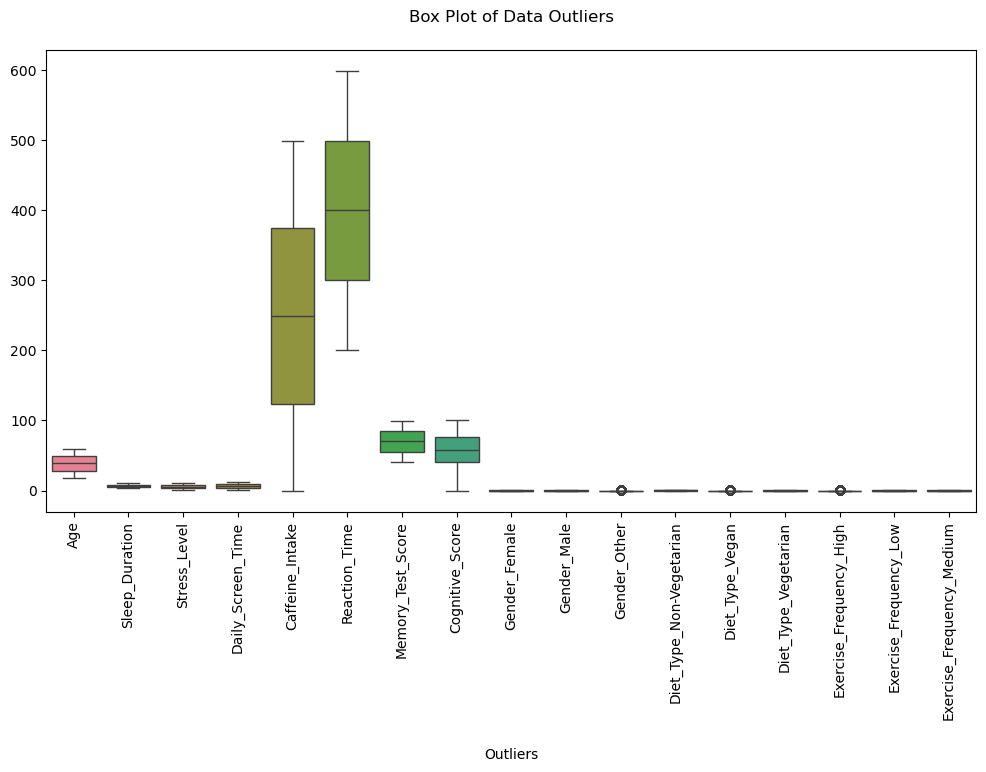

In [10]:
# Visualize with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy)
plt.title('Box Plot of Data Outliers', pad=20)
plt.xticks(rotation=90)
plt.xlabel('Outliers', labelpad=20)
plt.show()

Upon examining the box plot above, it is evident that while there are no distinct outliers, there is a variation in values. This indicates that data scaling is necessary, which will be performed prior to training the model.

**CONCLUSION:** 

There are no additional outliers to account for. Thus no more transformations are required.

<br>

## 5. Exploratory Data Analysis


### 5.1 Univariate Analysis

Each variable can be examined individually to understand its distribution, central tendency, and variability more clearly. This understanding is crucial for identifying the nature of the data, such as whether it is normally distributed or skewed, which is a crucial step in the data analysis process as it provides a comprehensive understanding of a single variable's purpose and characteristics. 

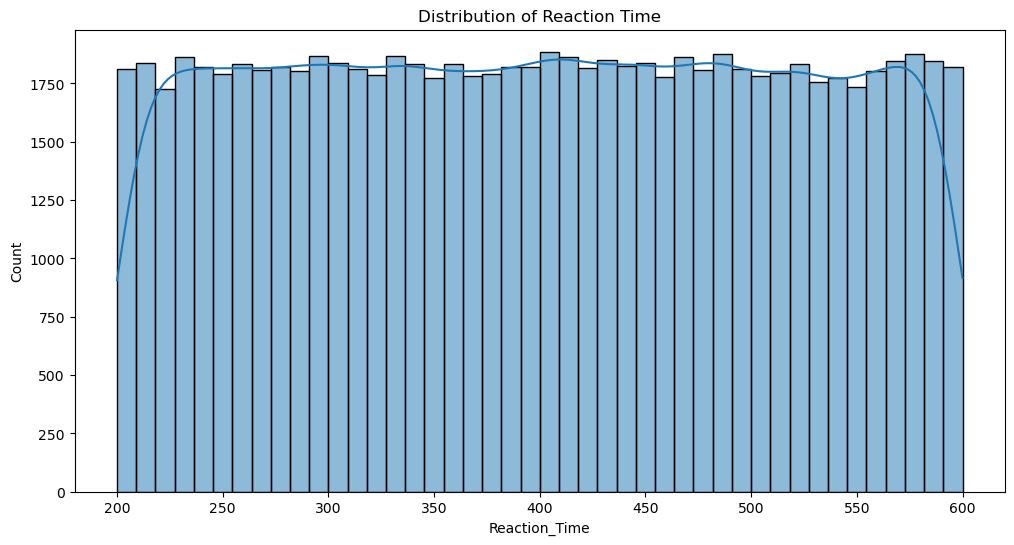

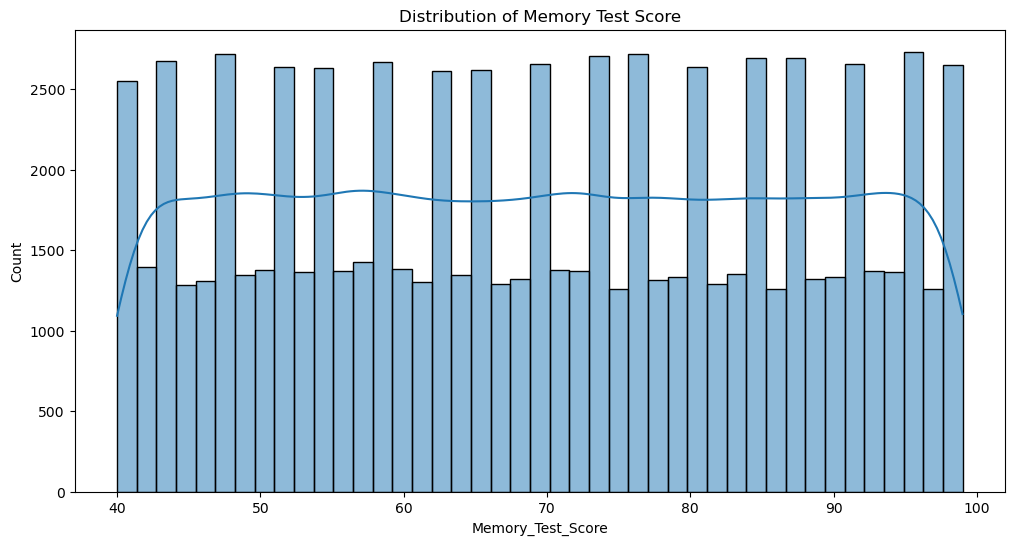

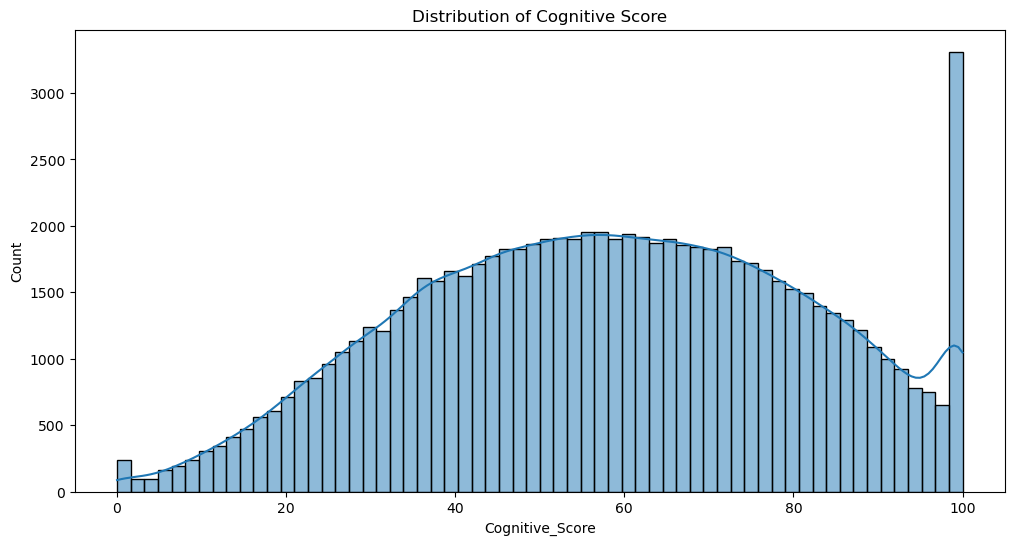

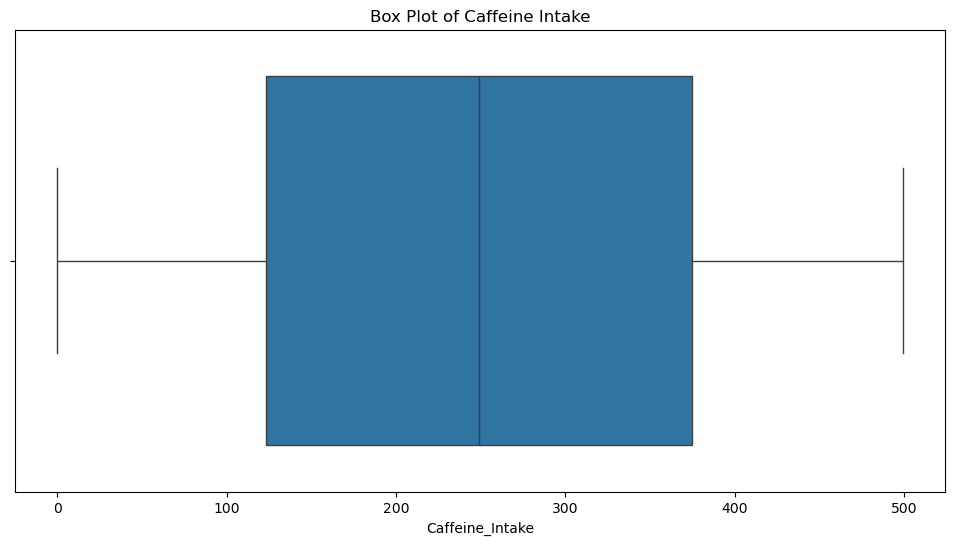

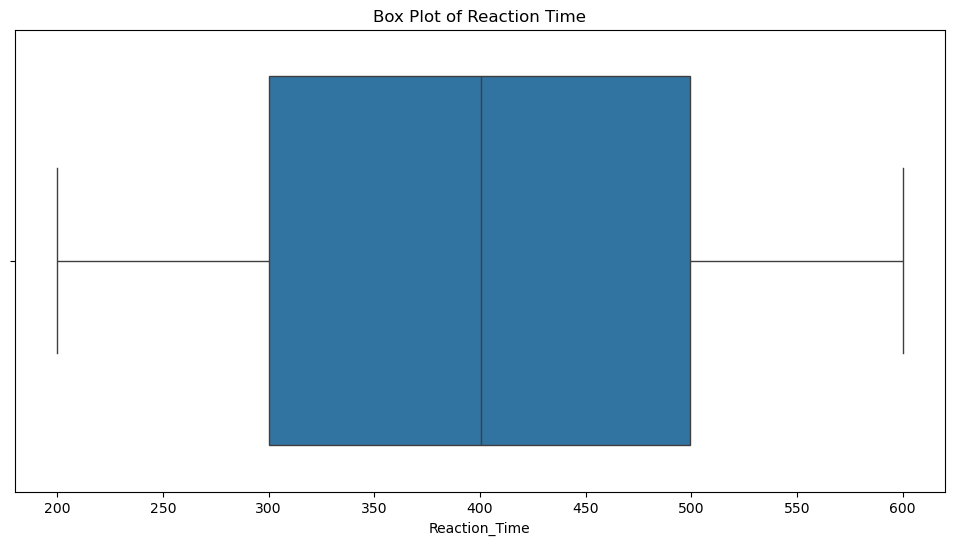

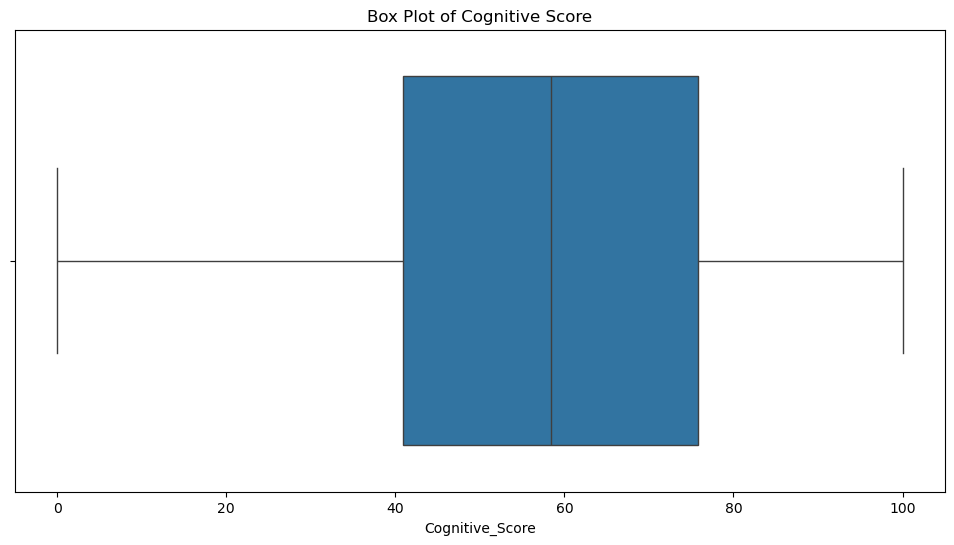

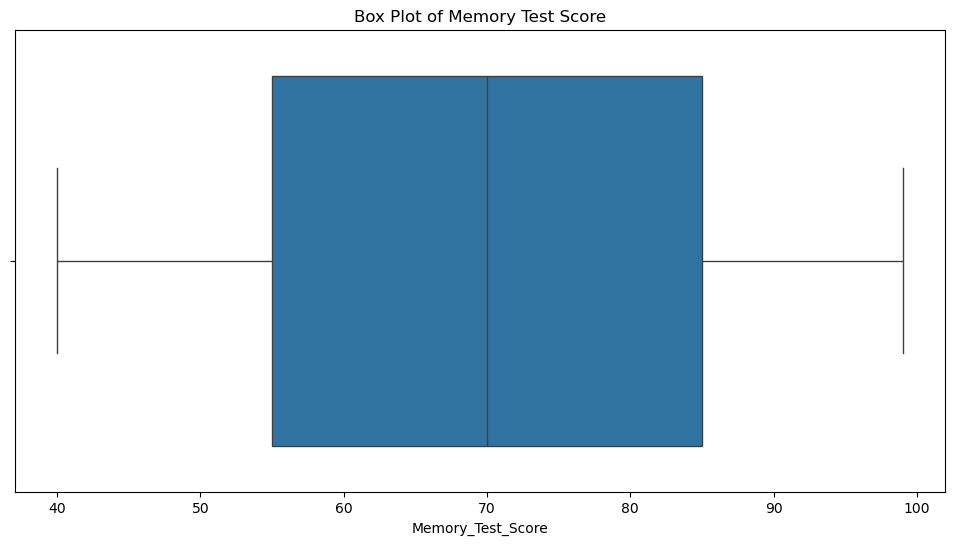

In [11]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Reaction_Time", kde=True)
plt.title("Distribution of Reaction Time")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Memory_Test_Score", kde=True)
plt.title("Distribution of Memory Test Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Cognitive_Score", kde=True)
plt.title("Distribution of Cognitive Score")
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Caffeine_Intake")
plt.title("Box Plot of Caffeine Intake")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Reaction_Time")
plt.title("Box Plot of Reaction Time")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Cognitive_Score")
plt.title("Box Plot of Cognitive Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Memory_Test_Score")
plt.title("Box Plot of Memory Test Score")
plt.show()

The `Cognitive Score` follows a normalized distribution, peaking at the 100 mark. This creates an over-representation, as this specific score is significantly higher than the others. The `Memory Score` exhibits a pattern where there are typically two normal bars followed by a high bar in each category, indicating a strong over-representation of certain samples. In contrast, the `Reaction Time` shows consistency, with an almost uniform distribution.

From these insights, it is clear that we have to use stratified sampling during modelling to ensure proportional representation across all classes during model training.

### 5.2 Bivariate Analysis

The relationships between variables can be examined to uncover patterns, correlations, or associations. This will help determine whether there is a statistical relationship between two variables and, if so, the nature and strength of that relationship.

<Figure size 1200x600 with 0 Axes>

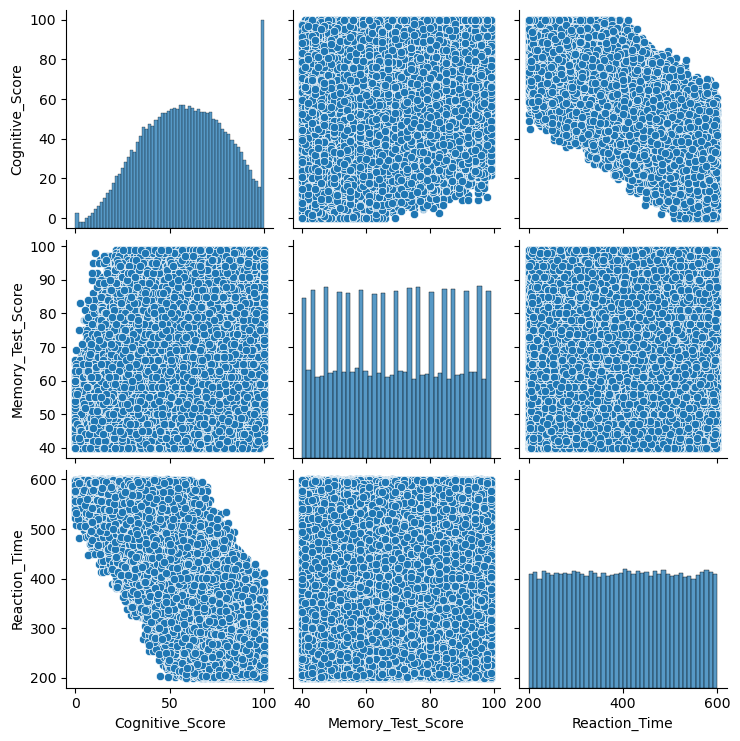

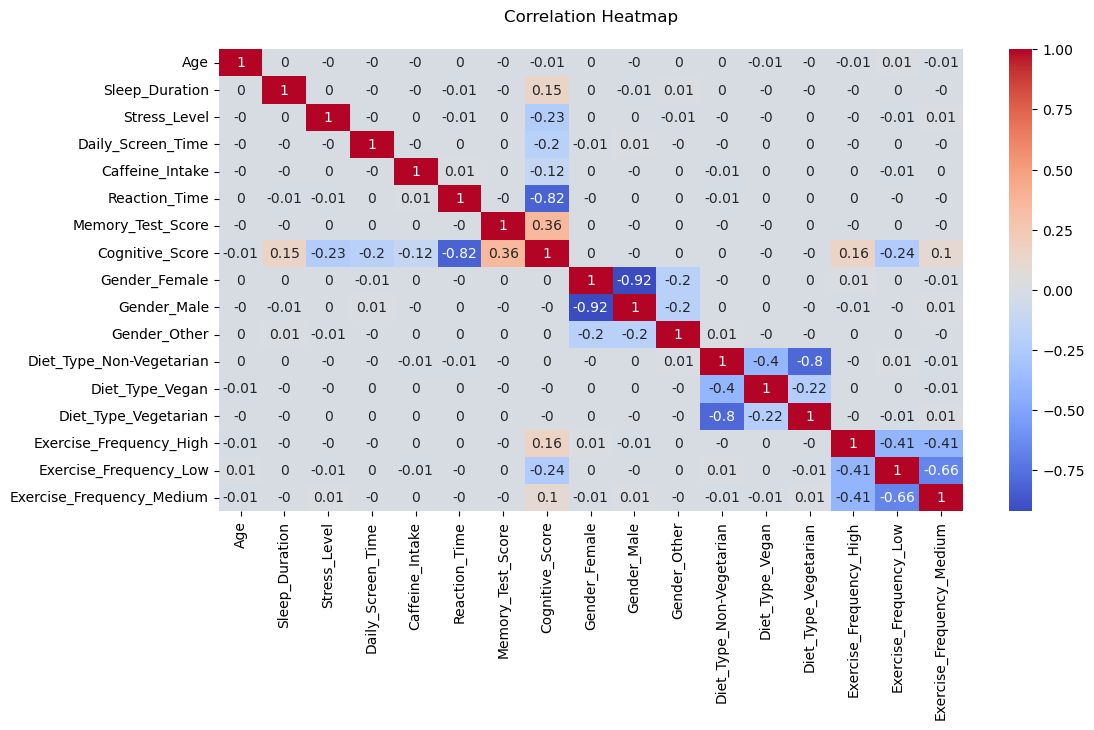

In [12]:
# Pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(data_copy, vars=["Cognitive_Score", "Memory_Test_Score", "Reaction_Time"])
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 6))
corr = data_copy.corr().round(2)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", pad=20)
plt.show()

`Reaction Time` is the most influential feature for predicting cognitive scores due to its strong negative correlation. `Memory Test Score` contributes moderately but may require scaling to improve its utility. Features like `Age`, `Sleep_Duration`, `Stress_Level`, and `Daily_Screen_Time` show very weak correlations with cognitive scores. These features likely contribute less to predictions compared to reaction time and memory test scores. However, these features will be retained in the model to potentially increase variation in predictions.

<br>

## 5. Model Training & Evaluation

In this section, we will train the model using the provided data, enabling it to make precise and informed predictions based on the patterns and insights derived from the dataset. 

In [13]:
# Define model sets
X = data_copy.drop('Cognitive_Score', axis=1)
y = data_copy['Cognitive_Score']

# Scale values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find classes with only one instance
value_counts = y.value_counts()
rare_classes = value_counts[value_counts == 1].index

# Create a modified target variable
y_modified = y.copy()
y_modified = np.where(np.isin(y, rare_classes), 'rare', y)

# Use the modified target for stratification (ensuring equal representation)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y_modified, random_state=42
)
assert X.shape[0] == y.shape[0], "X and y must have same number of samples"
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")


X_train: (64000, 16), y_train: (64000,)


In [14]:
# Choose model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Average CV Accuracy: {scores.mean():.2f}")

Average CV Accuracy: 1.00


In [16]:
# Make predictions for BOTH train and test
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [17]:
# Check for overfitting
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred):.3f}")

Train R²: 0.996
Test R²: 0.996


In [18]:
# Performance metrics
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

R² Score: 0.996
MSE: 2.26
MAE: 0.63


**CONCLUSION:**

**Train R²: 0.996**

- The model explains 99.6% of the variance in the training data, which is excellent.

- This suggests the model fits the training data very well.

**Test R²: 0.996**

- The model also explains 99.6% of the variance in the test data, indicating that it generalizes extremely well.

- The close match between train and test R² scores suggests no overfitting.

**MSE (Mean Squared Error): 2.26**

- The average squared difference between predicted and actual values is very low, confirming accurate predictions.

**MAE (Mean Absolute Error): 0.63**

- On average, predictions are off by only 0.63 units, which is highly precise given the range of Cognitive_Score (0-100).

With these results, the model is ready for deployment.

<br>

## 6. Model Deployment

In this section, the trained model will be exported for future use. This model will be deployed to Streamlit, allowing us to test and interact with it through an interface.

In [19]:
# Save model
joblib.dump(model, 'cognitive_model.pkl')

['cognitive_model.pkl']

**CONCLUSION:**

With the model exported, it can now be deployed using streamlit. This is done in a seperate file, called `app.py`, which can find within the project in the GitHub repository.